In [24]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
projection = "cat silhouette.png"
pet_length = 1   # length of pet, meters
pet_distance = 1 # distance from screen, meters
theta = 60       # webcam field of view, degrees
theta = theta * (2*np.pi / 360)

In [4]:
pet_image = Image.open(projection).transpose(method=Image.FLIP_TOP_BOTTOM)
pet_array = np.array(pet_image)
pet_values = [] # 1 if box is black and 0 if box is white
for i in range(len(pet_array)):
    pet_values_box = []
    for j in range(len(pet_array[0])):
        if sum(pet_array[i][j]) == 0:
            pet_values_box.append(0)
        else:
            pet_values_box.append(1)
    pet_values_box = np.array(pet_values_box)
    pet_values.append(pet_values_box)
pet_values = np.array(pet_values)

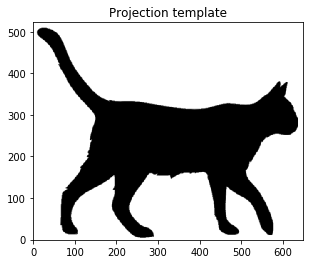

In [5]:
plt.imshow(pet_array, origin='lower')
plt.title("Projection template")
plt.show()

In [6]:
color = 'white'
left = False
right = False
for i in range(len(pet_array[0])):
    column = pet_array[:, i, None]
    if np.array([0, 0, 0]) in column and color == 'white':
        color = 'black'
        left = i
    if np.array([0, 0, 0]) not in column and color == 'black':
        right = i - 1
        color = None
pet_block_length = right - left # length of cat, blocks
fov_width = 2*pet_distance*np.tan(theta/2) # physical width of field of view at distance of pet
screen_width = int((fov_width/pet_length) * pet_block_length) # scales screen size accordingly, in blocks
screen_height = int(screen_width * (9/16))

In [46]:
tot_window_blocks = screen_width*screen_height
flux_list = []

x_init = screen_width + (2/3) * pet_block_length
y_init = screen_height/2
x = x_init
y = y_init
for k in range(screen_width + int((4/3) * pet_block_length)):
    tot_filled = 0 # number of filled blocks
    
    # move pet across screen
    x -= 1
    y = y
    
    right = x + screen_width / 2
    left = x - screen_width / 2
    top = y + screen_height / 2
    bottom = y - screen_height / 2
    
    # count the number of blocks the pet covers
    for i in range(len(pet_array)):
        for j in range(len(pet_array[0])):
            if left <= j and j <= right and bottom <= i and i <= top and pet_values[i][j] == 1:
                tot_filled += 1
    flux_list.append(1 - tot_filled/tot_window_blocks)

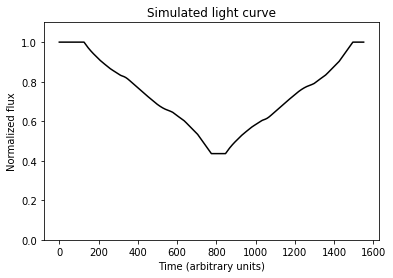

In [47]:
plt.plot(range(len(flux_list)), flux_list, 'k')
plt.ylim(0, 1.1)
plt.ylabel('Normalized flux')
plt.xlabel('Time (arbitrary units)')
plt.title('Simulated light curve')
plt.show()

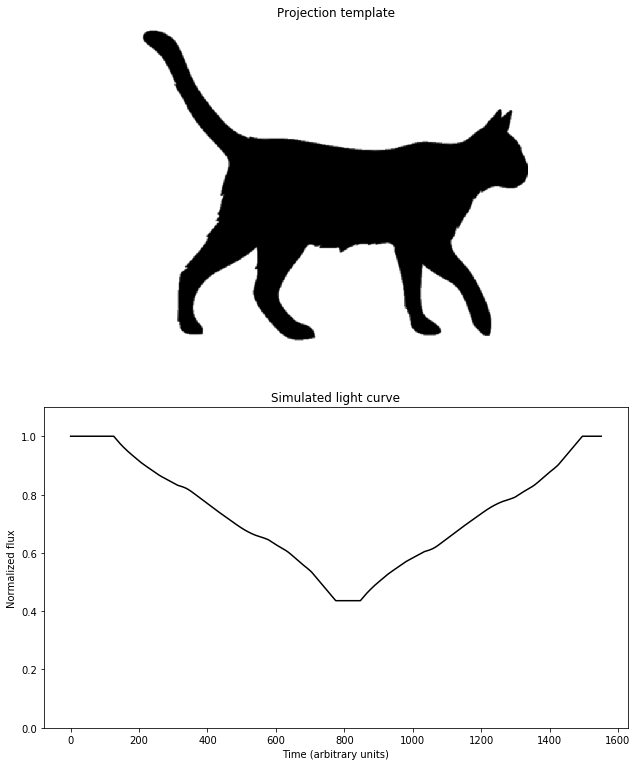

In [48]:
fig, axs = plt.subplots(2, 1, figsize=(len(pet_array)/50, len(pet_array[0])/50))
ax1, ax2 = axs

ax1.imshow(pet_array, origin='lower')
ax1.axis("off")
ax1.set_title("Projection template")

ax2.plot(range(len(flux_list)), flux_list, 'k')
ax2.set_ylim(0, 1.1)
ax2.set_ylabel('Normalized flux')
ax2.set_xlabel('Time (arbitrary units)')
ax2.set_title('Simulated light curve')
plt.savefig("template_and_light_curve.png")

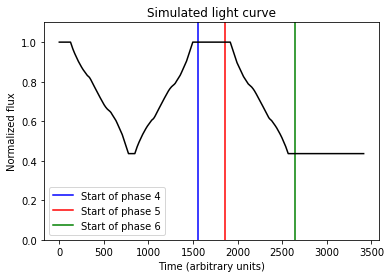

In [75]:
new_flux_list = []
phase_4 = len(flux_list)
for i in range(len(flux_list)):
    new_flux_list.append(flux_list[i])
new_flux_list += [1 for i in range(int(len(flux_list)/5))]
phase_5 = len(new_flux_list)
new_flux_list += reversed(flux_list[int(len(flux_list)/2):])
phase_6 = len(new_flux_list)
new_flux_list += [min(flux_list) for i in range(int(len(flux_list)/2))]

plt.axvline(phase_4, color='b', label='Start of phase 4')
plt.axvline(phase_5, color='r', label='Start of phase 5')
plt.axvline(phase_6, color='g', label='Start of phase 6')
plt.plot(range(len(new_flux_list)), new_flux_list, 'k')
plt.ylim(0, 1.1)
plt.legend()
plt.ylabel('Normalized flux')
plt.xlabel('Time (arbitrary units)')
plt.title('Simulated light curve')
plt.savefig("extended_transit.png")